# Bank Customer Reviews Analysis with Python

This Jupyter Notebook presents an analysis and visualization of customer reviews for various banks, demonstrating various skills in Python programming. The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/dhavalrupapara/banks-customer-reviews-dataset), and it includes valuable information such as bank names, customer ratings, dates, and detailed review texts.

## Python Skills Demonstrated

### 1. **Data Cleaning and Preprocessing:**
   - Loading and handling datasets using Pandas.
   - Cleaning and organizing data for analysis.

### 2. **Data Visualization:**
   - Using Plotly Express and Matplotlib for creating interactive and static visualizations.
   - Generating line charts, word clouds, and histograms to convey insights.

### 3. **Text Analysis:**
   - Implementing sentiment analysis using the TextBlob library.
   - Extracting meaningful information from textual data.

## Data Source

The dataset is sourced from Kaggle and provides insights into customer sentiments and experiences with different banks. Please refer to the Kaggle dataset [link](https://www.kaggle.com/dhavalrupapara/banks-customer-reviews-dataset) for additional details and to access the raw data.

## Visualizations

The notebook includes the following visualizations and analyses:

1. **Reviews Over Time:** A line chart depicting the number of reviews over time.

2. **Top Words WordCloud:** A word cloud showcasing the most frequent words in reviews.

3. **Detailed Review Information:** A table displaying detailed information about the reviews, including columns such as date, rating, and the review text.

4. **Sentiment Analysis:** A histogram illustrating the sentiment analysis of reviews.

## Instructions

Explore the different sections of the notebook to gain insights into customer reviews for the selected banks.

## Note

This analysis not only provides insights into customer reviews but also showcases various Python skills used for data analysis and visualization.


# Import necessary libraries


In [97]:
import pandas as pd


# Load the Bank Reviews Dataset


In [98]:
file_path = '/Users/avanderveur/Desktop/Python/BRD.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset


In [99]:
df.head()


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


# Check for missing values


In [100]:
print(df.isnull().sum())


author                  4
date                    0
address                 0
bank                    0
rating                  0
review_title_by_user    0
review                  0
bank_image              0
rating_title_by_user    0
useful_count            0
dtype: int64


# Handle missing values (if any)


In [101]:
df = df.dropna()


# Explore basic statistics of the dataset


In [102]:
df.describe()


,rating,useful_count
count,996.000000,996.000000
mean,4.354418,2.712851
std,0.940646,7.579122
min,0.500000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,133.000000



# Import necessary libraries for visualization




In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style for visualizations


In [104]:
sns.set(style="whitegrid")


# Visualization 1: Distribution of Ratings


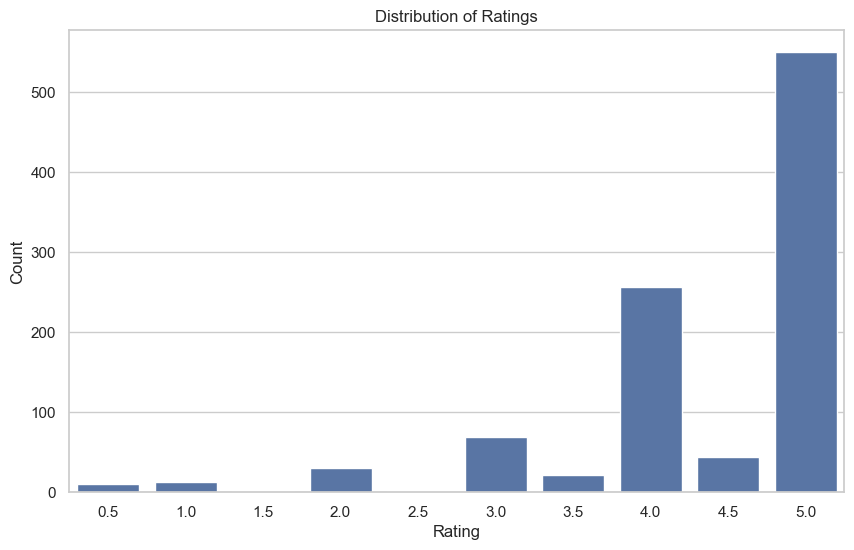

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Visualization 2: Distribution of Useful Counts


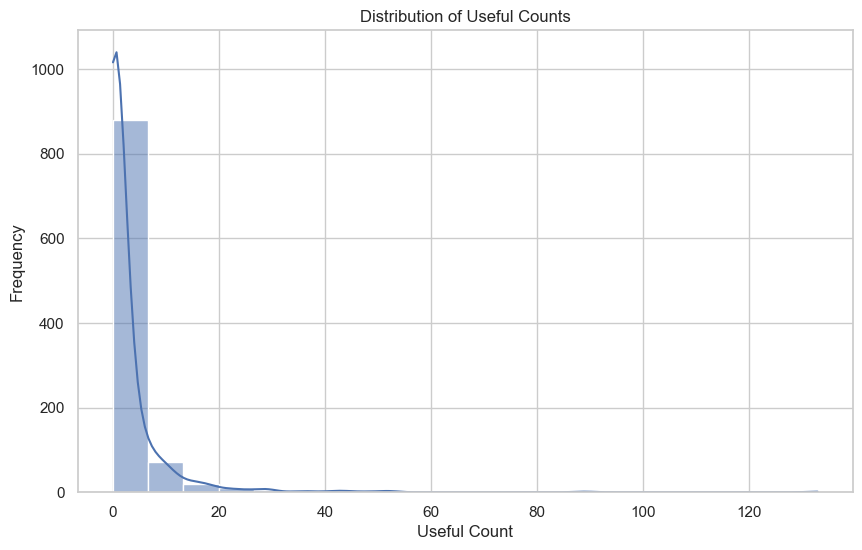

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['useful_count'], bins=20, kde=True)
plt.title('Distribution of Useful Counts')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.show()


# Visualization 3: Average Rating by Bank


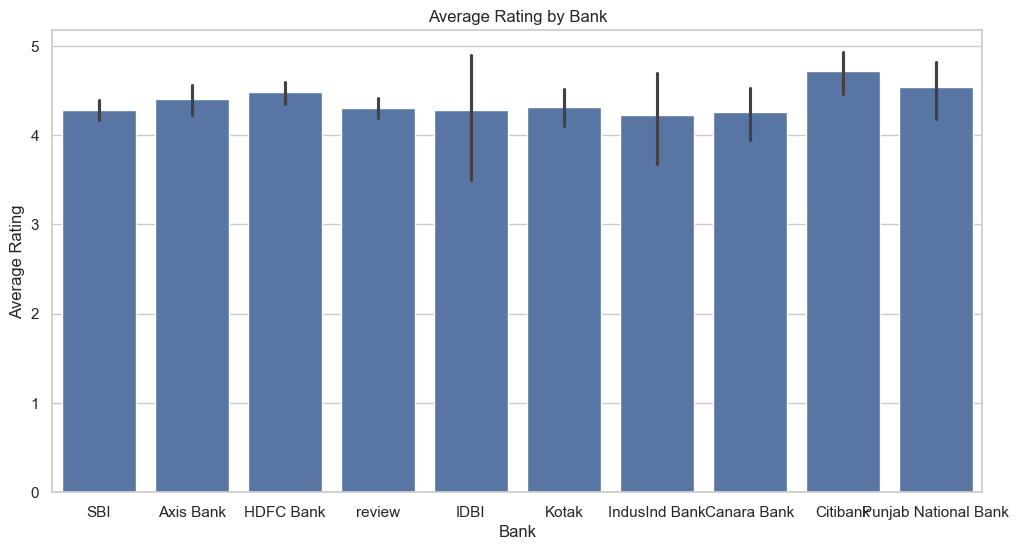

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bank', y='rating', data=df)
plt.title('Average Rating by Bank')
plt.xlabel('Bank')
plt.ylabel('Average Rating')
plt.show()

# Select the top 10 cities by review count


In [108]:
top_cities = df['address'].value_counts().nlargest(10).index


# Visualization 4: Review Counts by Top 10 Cities


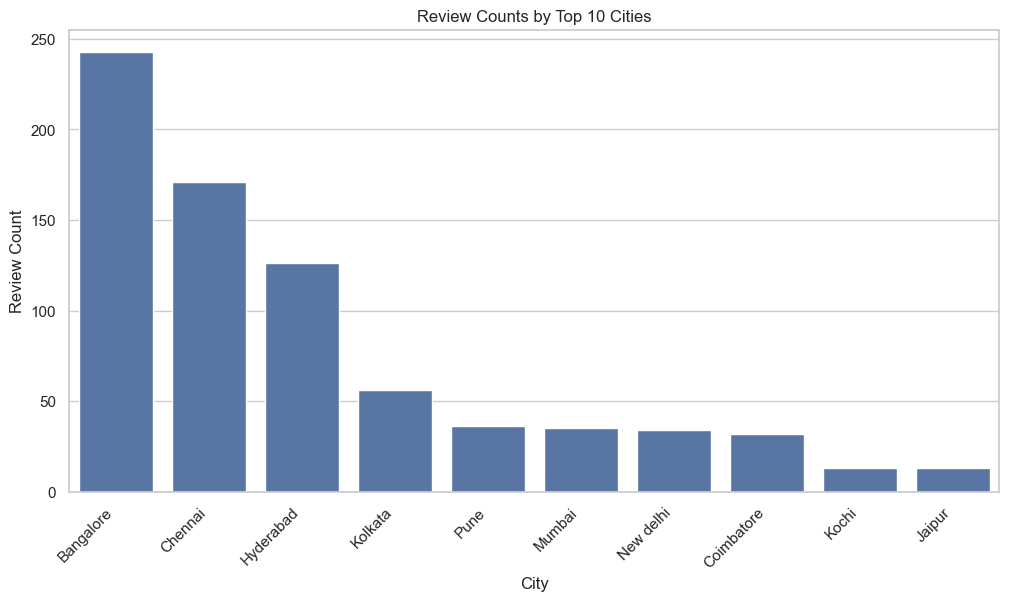

In [109]:
plt.figure(figsize=(12, 6))
sns.countplot(x='address', data=df[df['address'].isin(top_cities)], order=top_cities)
plt.title('Review Counts by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 5: Rating Distribution by Bank


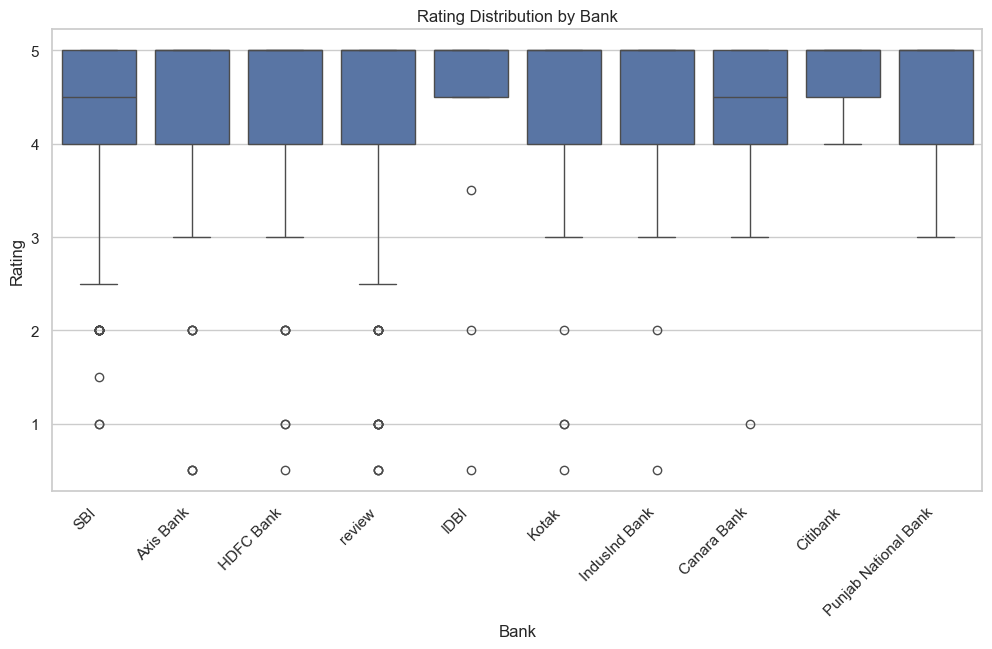

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bank', y='rating', data=df)
plt.title('Rating Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 6: Correlation Heatmap


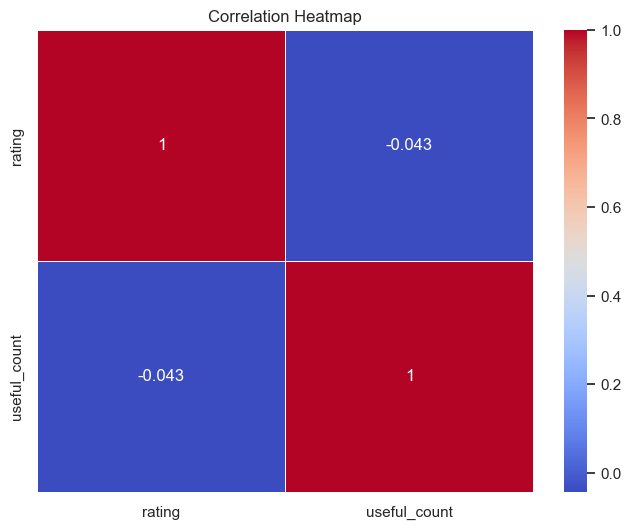

In [111]:
correlation_matrix = df[['rating', 'useful_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualization 7: Distribution of Review Lengths


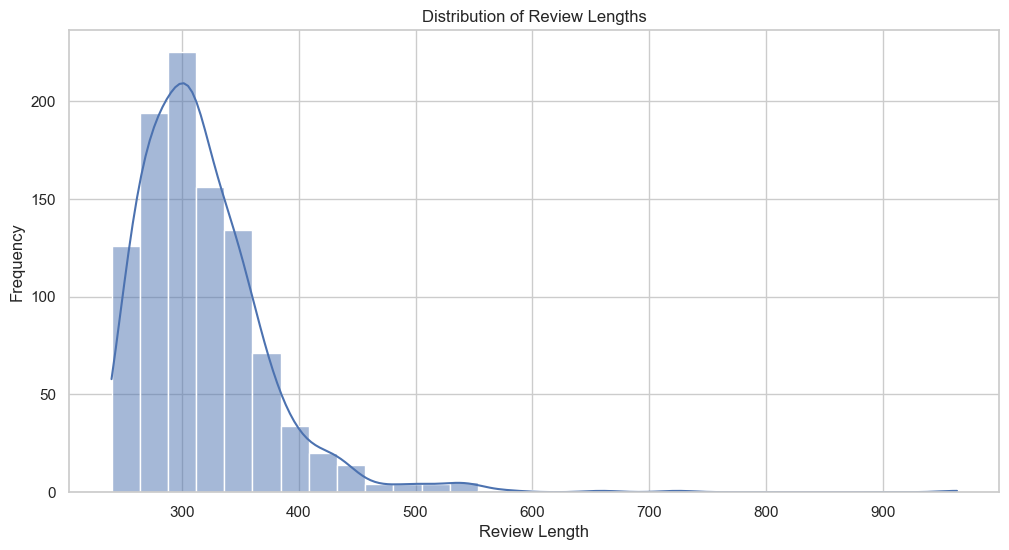

In [112]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Visualization 8: Top Words in Reviews


In [113]:
from wordcloud import WordCloud


# Combine all reviews into a single string


In [114]:
all_reviews = ' '.join(df['review'])


# Create a WordCloud


In [115]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)


# Visualization 9: WordCloud


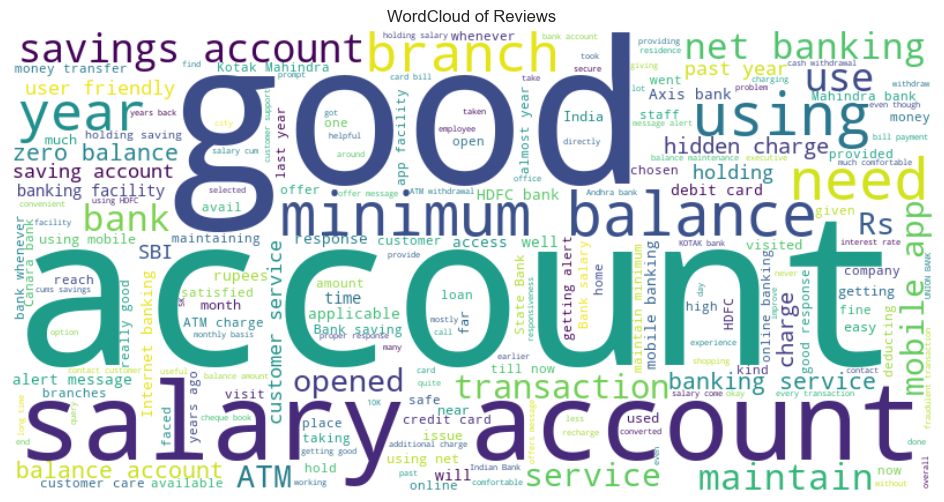

In [116]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews')
plt.show()


Sentiment Analysis
# Import necessary libraries


In [117]:
from textblob import TextBlob


# Function to get sentiment polarity


In [118]:
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each review


In [119]:
df['sentiment_polarity'] = df['review'].apply(get_sentiment_polarity)


# Visualization 10: Distribution of Sentiment Polarity


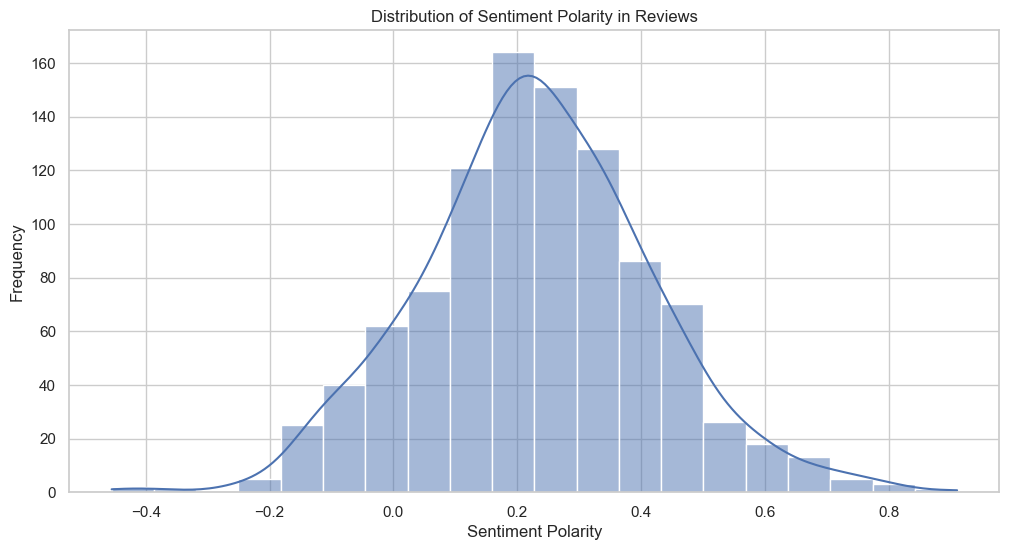

In [120]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_polarity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis
# Convert the 'date' column to datetime format


In [121]:
df['date'] = pd.to_datetime(df['date'])


# Visualization 11: Number of Reviews Over Time


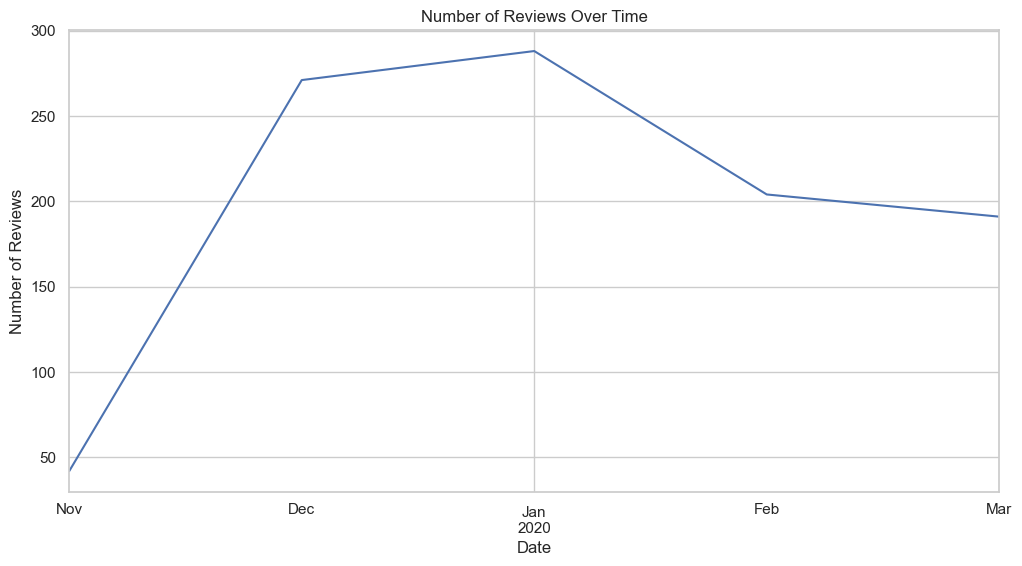

In [122]:
plt.figure(figsize=(12, 6))
df.set_index('date')['rating'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization 12: Average Rating Over Time


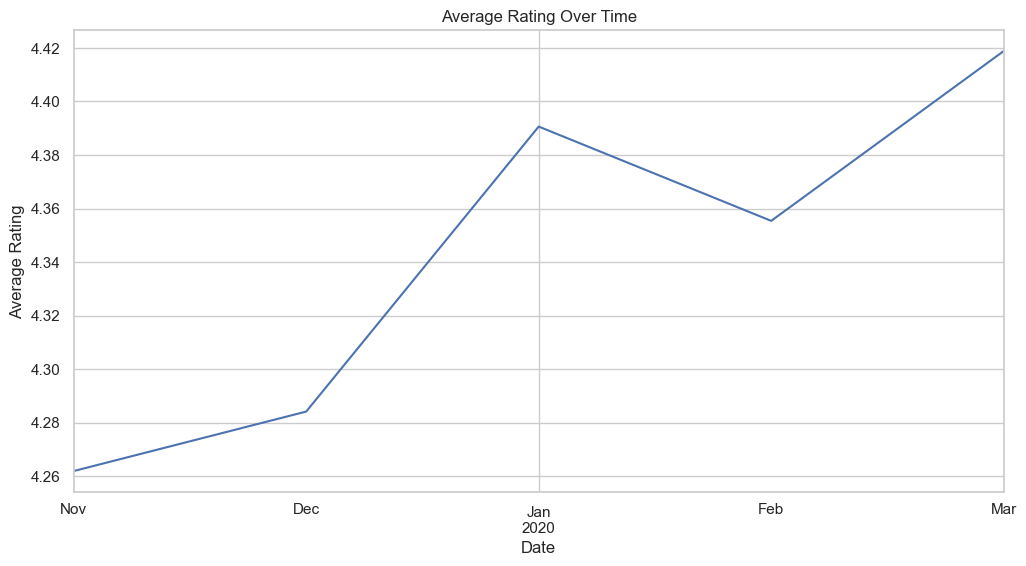

In [123]:
plt.figure(figsize=(12, 6))
df.set_index('date')['rating'].resample('M').mean().plot()
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

# Visualization 13: Review Length vs. Rating


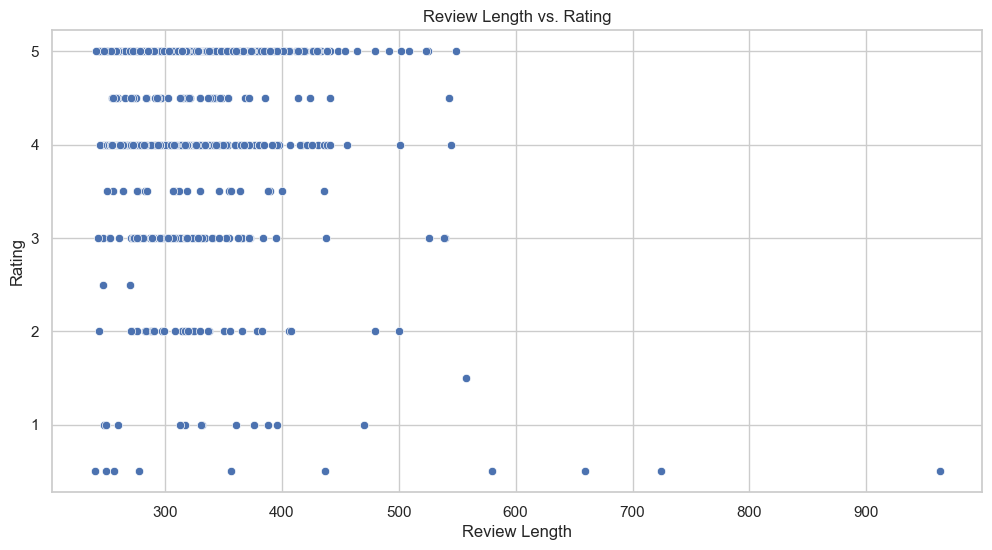

In [124]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_length', y='rating', data=df)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

# Visualization 14: Top Words by Rating


In [125]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [126]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avanderveur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Remove common English stopwords


In [127]:
stop_words = set(stopwords.words('english'))
df['review_tokens'] = df['review'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Count word frequencies for each rating


In [128]:
word_counts_by_rating = {rating: Counter(word for words in df[df['rating'] == rating]['review_tokens'] for word in words) for rating in df['rating'].unique()}


# Visualize the top 10 words for each rating


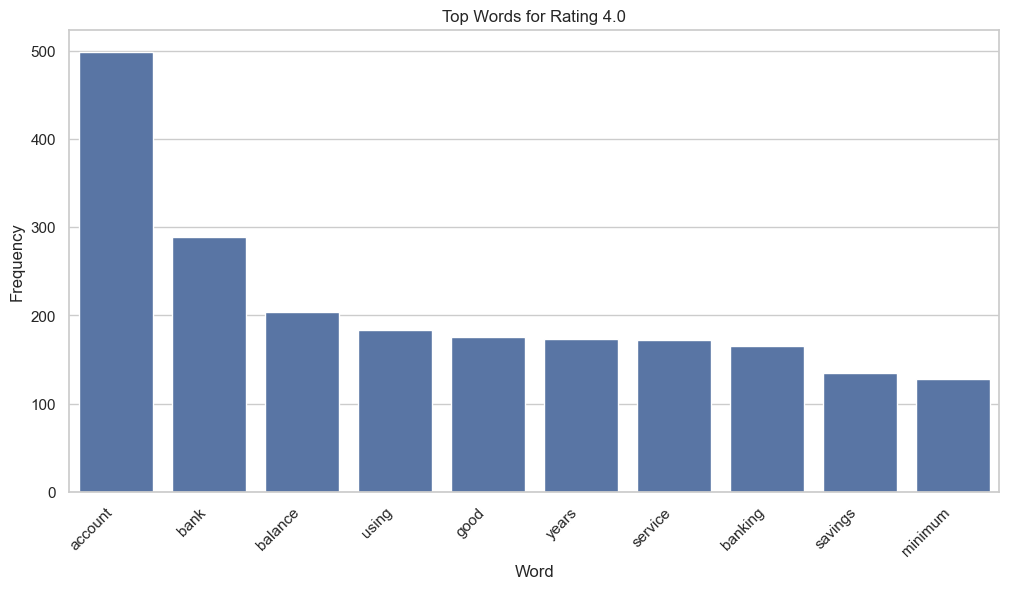

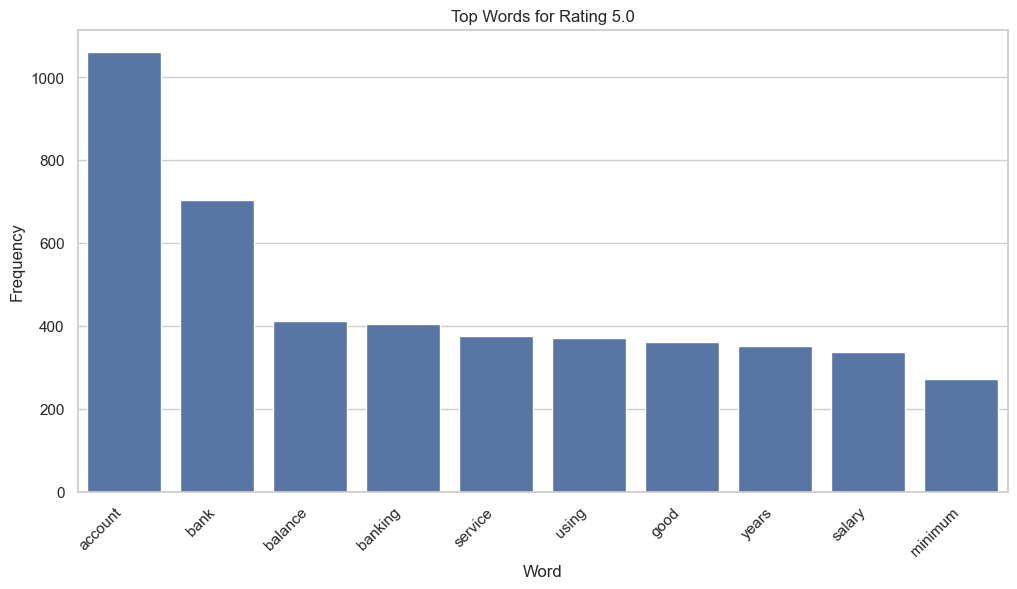

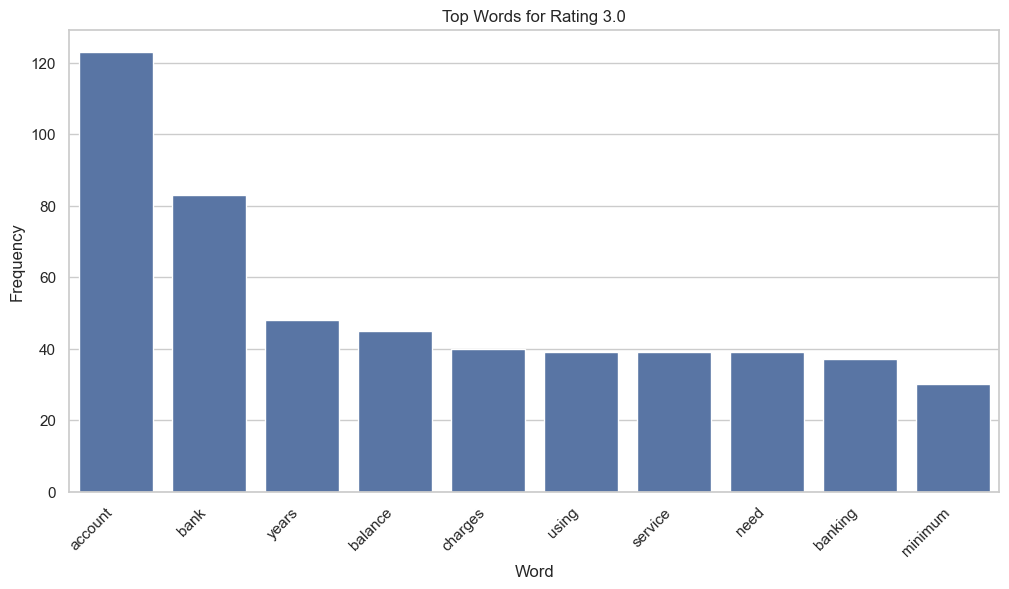

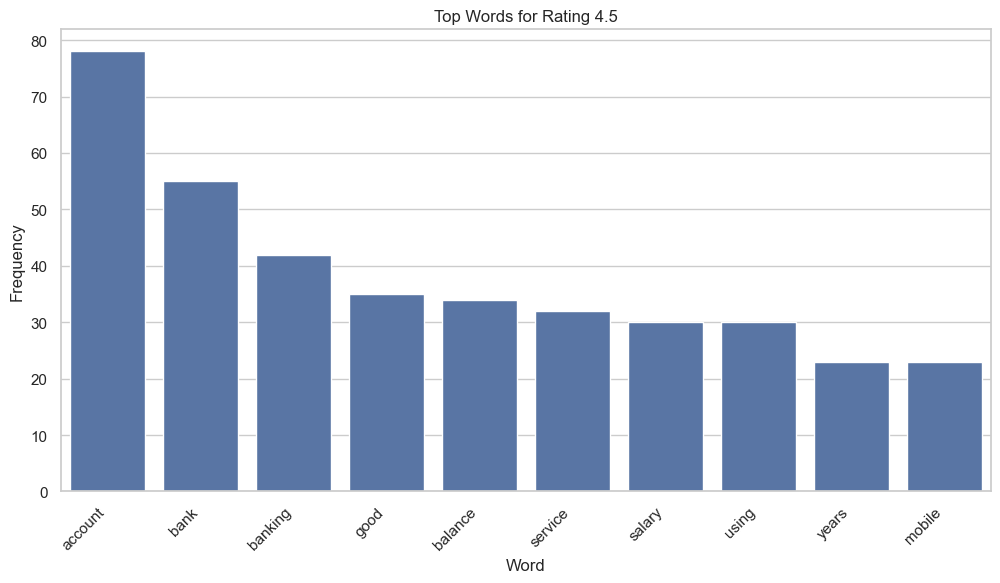

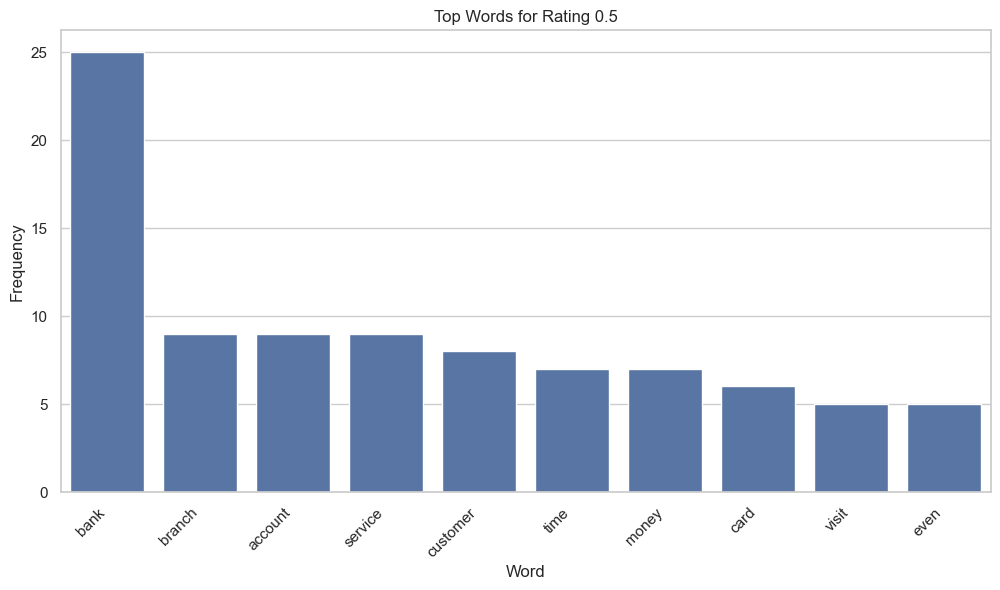

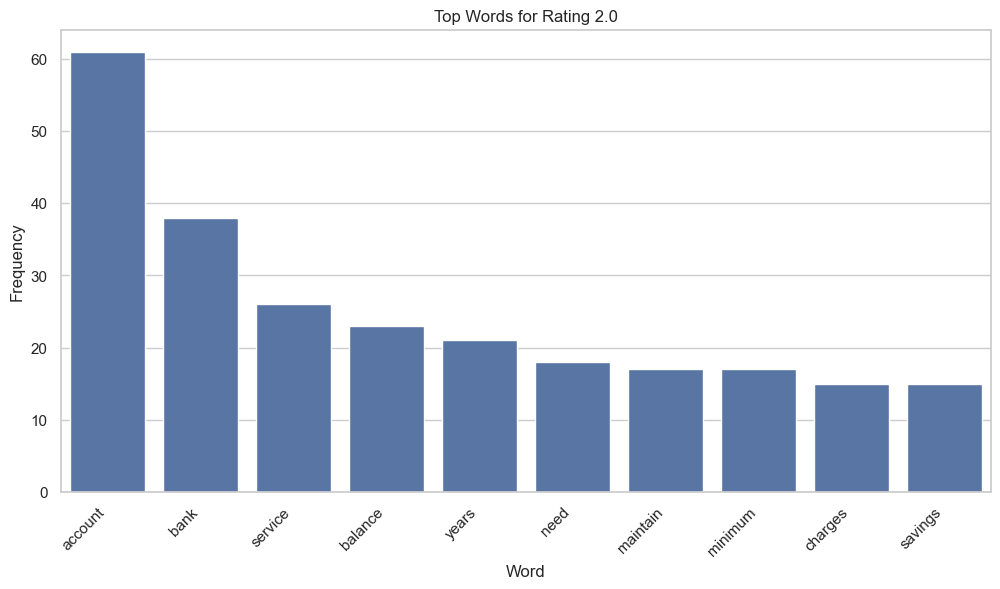

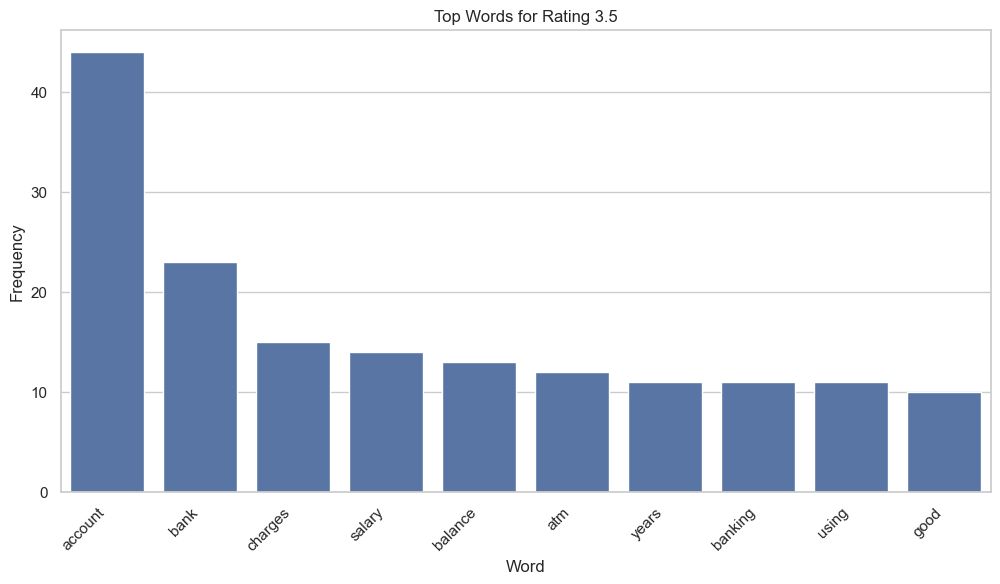

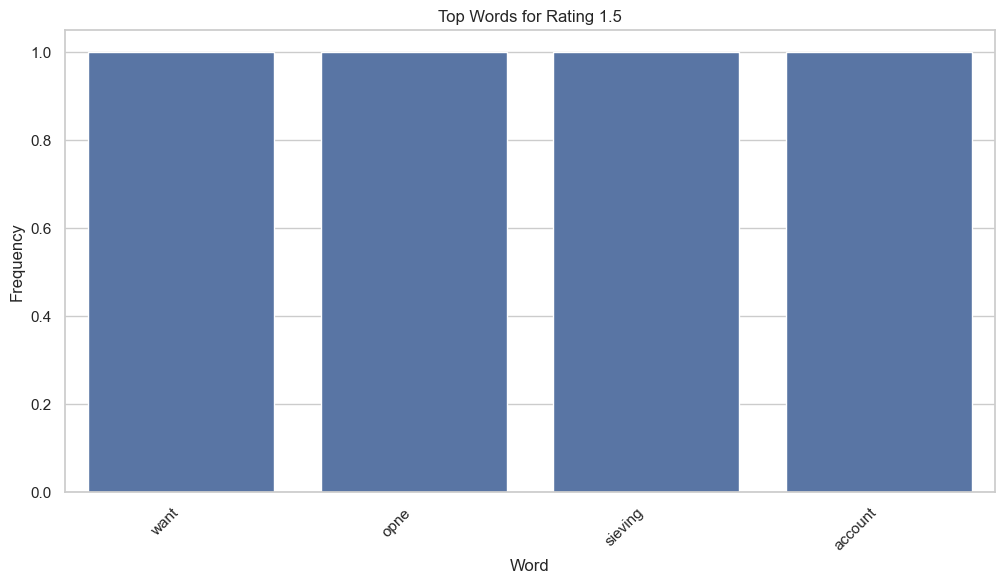

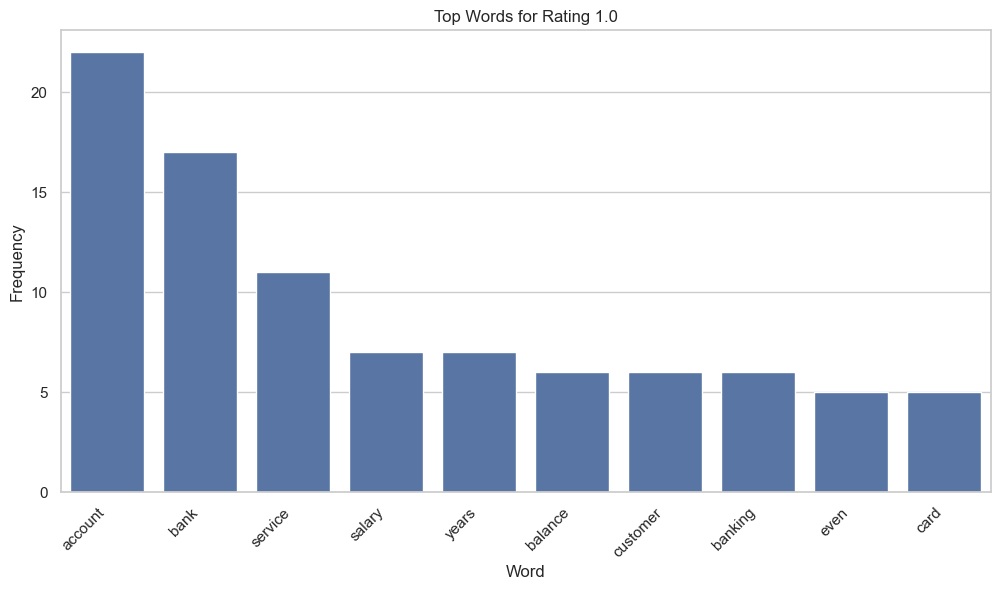

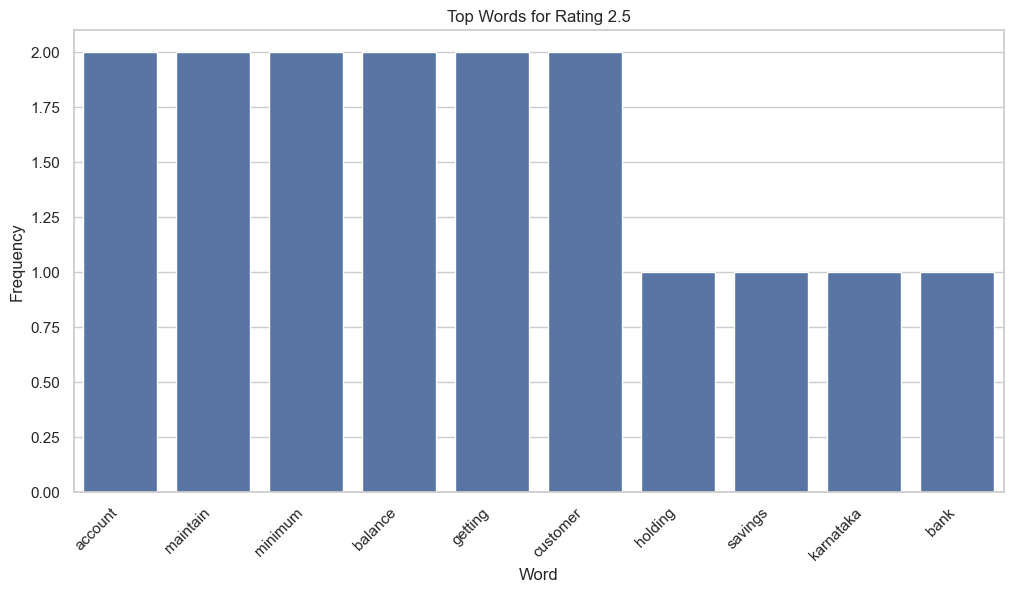

In [129]:
for rating, word_counts in word_counts_by_rating.items():
    top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
    plt.title(f'Top Words for Rating {rating}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()
